# Load Libraries

In [106]:
import numpy as np
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation"from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from tqdm import tqdm_notebook
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
warnings.filterwarnings("ignore")
style.use('ggplot')

In [107]:
"""I will be using this data to predict Potability, a measure used to determine whether water is safe for human consumption.
Potanility is represented by a 0 or 1 where 1 indiciates water is safe for consumption and 0 indicating water is not safe for drinking""".replace("\n","")

'I will be using this data to predict Potability, a measure used to determine whether water is safe for human consumption.Potanility is represented by a 0 or 1 where 1 indiciates water is safe for consumption and 0 indicating water is not safe for drinking'

# Functions Used

In [108]:
# source: https://www.kaggle.com/d4rklucif3r/water-quality-eda-luciferml-73-accuracy
def boxPlotter(DataFrame, ColumnName):
    # Plots boxplots for column given as parameter.    
    sns.catplot(x="Potability", y=ColumnName, data=DataFrame, kind="box")

In [109]:
# source: https://www.kaggle.com/d4rklucif3r/water-quality-eda-luciferml-73-accuracy
def distributionPlot(DataFrame):
     # Creates distribution plot.
    fig = plt.figure(figsize=(20, 20))
    for i in tqdm_notebook(range(0, len(DataFrame.columns[:-1])), desc = 'Your plots are being ready'):
        fig.add_subplot(np.ceil(len(DataFrame.columns)/3), 3, i+1)
        sns.distplot(
            DataFrame.iloc[:, i], color="lightcoral", rug=True)
        fig.tight_layout(pad=3.0)

# Load Data

In [110]:
# source: https://www.kaggle.com/adityakadiwal/water-potability
water_data = pd.read_csv(r'C:\Users\ranih\OneDrive\Desktop\Python For Real\Github\Data\Kaggle\Water Quality/water_potability.csv')
water_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.89,20791.32,7.30,368.52,564.31,10.38,86.99,2.96,0
1,3.72,129.42,18630.06,6.64,NaN,592.89,15.18,56.33,4.50,0
2,8.10,224.24,19909.54,9.28,NaN,418.61,16.87,66.42,3.06,0
3,8.32,214.37,22018.42,8.06,356.89,363.27,18.44,100.34,4.63,0
4,9.09,181.10,17978.99,6.55,310.14,398.41,11.56,32.00,4.08,0


In [111]:
water_data.shape

(3276, 10)

# Data Exploration

In [112]:
water_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [113]:
"""Data types consist of intergers and floats, our dependent variable, Potability, is an integer"""

'Data types consist of intergers and floats, our dependent variable, Potability, is an integer'

In [114]:
water_data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080804,196.369481,22014.092415,7.122241,333.775784,426.205171,14.284921,66.396281,3.966731,0.390110
std,1.594369,32.879680,8768.570852,1.583143,41.416864,80.824123,3.308232,16.174983,0.780354,0.487849
min,0.000000,47.430000,320.940000,0.350000,129.000000,181.480000,2.200000,0.740000,1.450000,0.000000
25%,6.090000,176.847500,15666.687500,6.130000,307.695000,365.735000,12.070000,55.847500,3.440000,0.000000
50%,7.040000,196.965000,20927.830000,7.130000,333.070000,421.885000,14.220000,66.620000,3.955000,0.000000
75%,8.060000,216.670000,27332.760000,8.112500,359.950000,481.790000,16.560000,77.337500,4.500000,1.000000
max,14.000000,323.120000,61227.200000,13.130000,481.030000,753.340000,28.300000,124.000000,6.740000,1.000000


In [115]:
water_data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [116]:
"""I will need to fill in these missing values. Missing values will be determine/filled by predicting by leveraging the other
columns in this dataset""".replace("\n","")

'I will need to fill in these missing values. Missing values will be determine/filled by predicting by leveraging the othercolumns in this dataset'

In [117]:
# Predictor variable
water_data['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [118]:
not_drink =round(water_data['Potability'].value_counts()[0]/(water_data['Potability'].value_counts()[0] + water_data['Potability'].value_counts()[1])
,2)
drinkable =round(water_data['Potability'].value_counts()[1]/(water_data['Potability'].value_counts()[0] + water_data['Potability'].value_counts()[1])
,2)
print("not drinkable:", not_drink)
print("drinkable:", drinkable)

not drinkable: 0.61
drinkable: 0.39


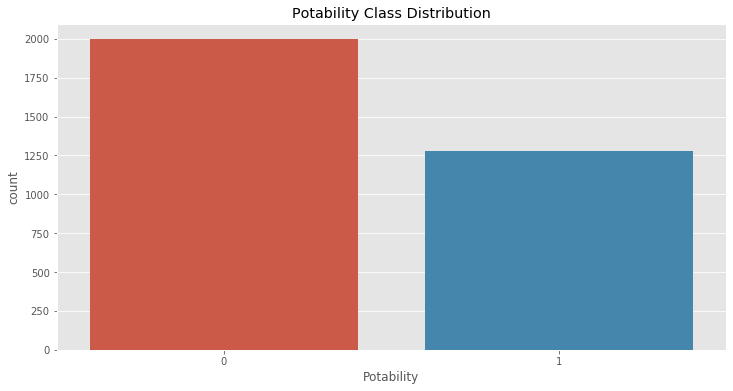

In [119]:
plt.figure(figsize=(12,6))
sns.countplot(x='Potability', data=water_data)

plt.title("Potability Class Distribution")

plt.show()

In [120]:
"""Our predictor variable contains 2 levels, 0 and 1. 61% of the classes are not drinkable while 39% is classified as drinkable.
It is worth keeping mind there may be a bit of an unbalanced issue among the 2 class values that needs to be accounted for."""

'Our predictor variable contains 2 levels, 0 and 1. 61% of the classes are not drinkable while 39% is classified as drinkable.\nIt is worth keeping mind there may be a bit of an unbalanced issue among the 2 class values that needs to be accounted for.'

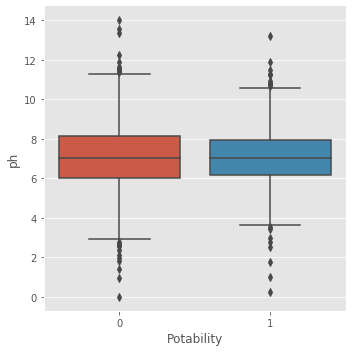

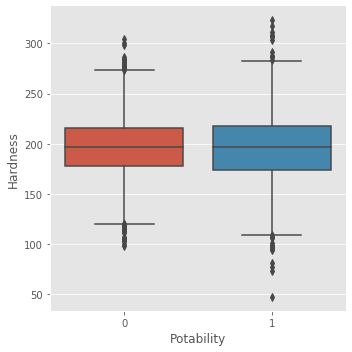

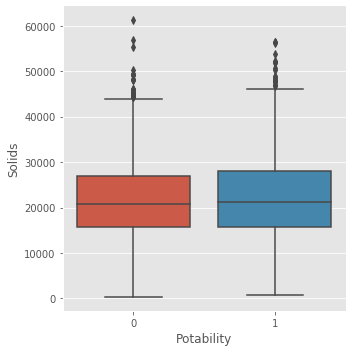

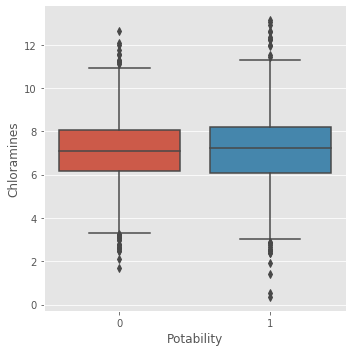

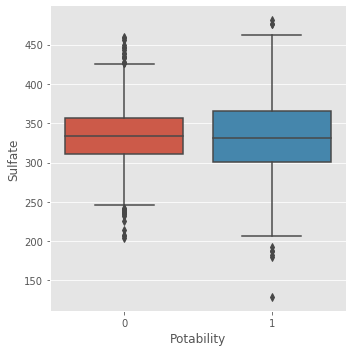

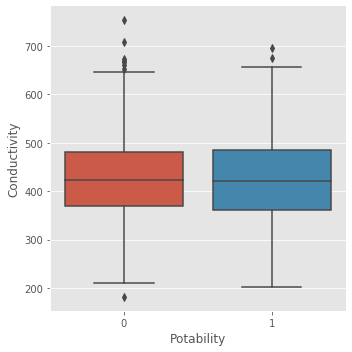

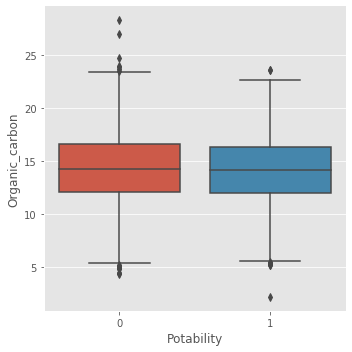

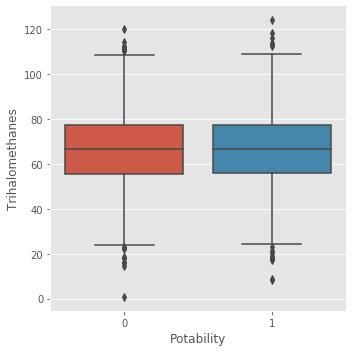

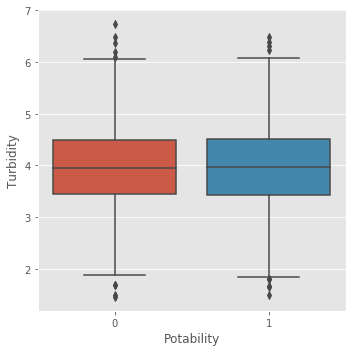

In [121]:
# source: https://www.kaggle.com/d4rklucif3r/water-quality-eda-luciferml-73-accuracy
cols = list(water_data.columns[:-1]) # -1 will exclude the dependent variable, Potability.
for column in tqdm_notebook(cols, desc = "Your Charts are being ready"):
     boxPlotter(water_data, column)

'Overall, the features of this dataset appear to have a fairly normal disribution. Solid appears to be one feature that contains a right skew and it will be good to explore the feature further. However, it will still be useful to normals the features when running our data through models.'

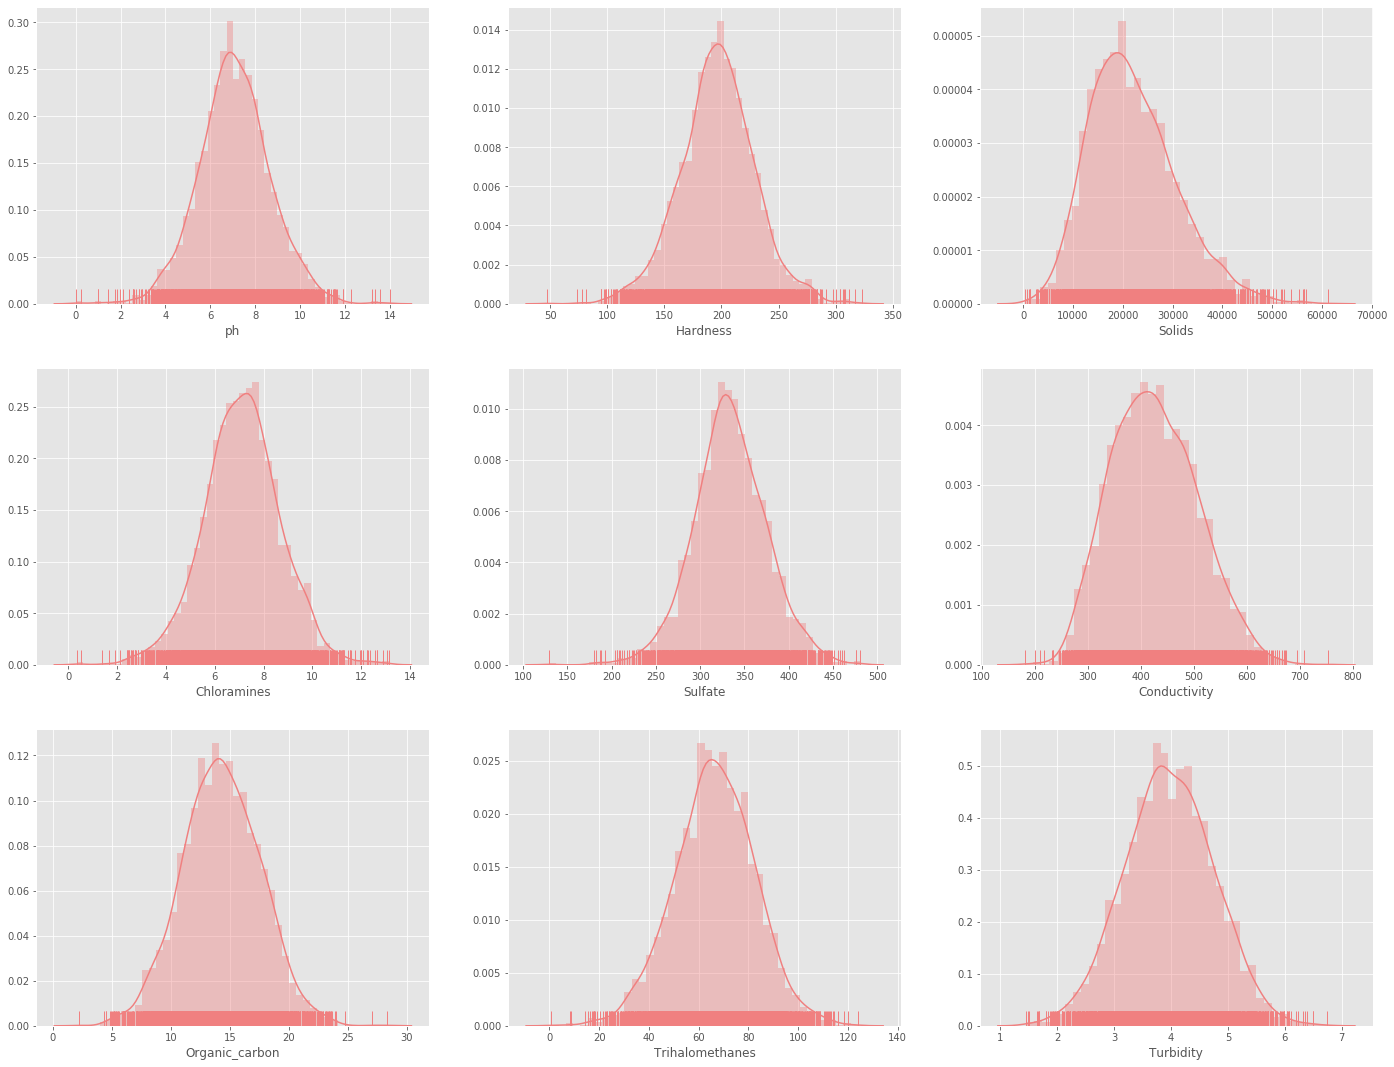

In [122]:
# source: https://www.kaggle.com/d4rklucif3r/water-quality-eda-luciferml-73-accuracy
distributionPlot(water_data)

"""Overall, the features of this dataset appear to have a fairly normal disribution. Solid appears to be one feature that contains a right skew and it will be good to explore the feature further. However, it will still be 
useful to normals the features when running our data through models.""".replace("\n", "")

In [123]:
"""Overall, the features of this dataset appear to have a fairly normal disribution. Solid appears to be one feature that contains a right skew and it will be good to explore the feature further. However, it will still be 
useful to normals the features when running our data through models.""".replace("\n", "")

'Overall, the features of this dataset appear to have a fairly normal disribution. Solid appears to be one feature that contains a right skew and it will be good to explore the feature further. However, it will still be useful to normals the features when running our data through models.'

# Filling in NA values

In [124]:
water_data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [125]:
# filling in NA with the mean based on the value of our predictor
# source: https://www.kaggle.com/deblina00/drinking-water-potability-eda-and-prediction#EXPLORING-DATA-THROUGH-VISUALS
pH_0 = water_data[water_data['Potability'] == 0]['ph'].mean(skipna=True)
pH_1 = water_data[water_data['Potability'] == 1]['ph'].mean(skipna=True)

water_data.loc[(water_data['Potability'] == 0) & (water_data['ph'].isna()), 'ph'] = pH_0
water_data.loc[(water_data['Potability'] == 1) & (water_data['ph'].isna()), 'ph'] = pH_1

In [126]:
# filling in NA with the mean based on the value of our predictor
# source: https://www.kaggle.com/deblina00/drinking-water-potability-eda-and-prediction#EXPLORING-DATA-THROUGH-VISUALS
sulf_0 = water_data[water_data['Potability'] == 0]['Sulfate'].mean(skipna=True)
sulf_1 = water_data[water_data['Potability'] == 1]['Sulfate'].mean(skipna=True)

water_data.loc[(water_data['Potability'] == 0) & (water_data['Sulfate'].isna()), 'Sulfate'] = sulf_0
water_data.loc[(water_data['Potability'] == 1) & (water_data['Sulfate'].isna()), 'Sulfate'] = sulf_1

In [127]:
# filling in NA with the mean based on the value of our predictor
# source: https://www.kaggle.com/deblina00/drinking-water-potability-eda-and-prediction#EXPLORING-DATA-THROUGH-VISUALS
tri_0 = water_data[water_data['Potability'] == 0]['Trihalomethanes'].mean(skipna=True)
tri_1 = water_data[water_data['Potability'] == 1]['Trihalomethanes'].mean(skipna=True)

water_data.loc[(water_data['Potability'] == 0) & (water_data['Trihalomethanes'].isna()), 'Trihalomethanes'] = tri_0
water_data.loc[(water_data['Potability'] == 1) & (water_data['Trihalomethanes'].isna()), 'Trihalomethanes'] = tri_1

In [128]:
water_data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [129]:
water_data['Potability'] = water_data['Potability'].astype('category')
water_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ph               3276 non-null   float64 
 1   Hardness         3276 non-null   float64 
 2   Solids           3276 non-null   float64 
 3   Chloramines      3276 non-null   float64 
 4   Sulfate          3276 non-null   float64 
 5   Conductivity     3276 non-null   float64 
 6   Organic_carbon   3276 non-null   float64 
 7   Trihalomethanes  3276 non-null   float64 
 8   Turbidity        3276 non-null   float64 
 9   Potability       3276 non-null   category
dtypes: category(1), float64(9)
memory usage: 233.8 KB


# Trial 1: Decision Tree

In [130]:
water_data = water_data.sample(frac=1)
water_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
2269,7.390000,178.34,12928.64,7.83,334.564311,376.49,18.11,40.40,3.85,0
29,7.085386,148.15,15193.41,9.05,307.010000,563.80,16.57,52.68,6.04,0
1,3.720000,129.42,18630.06,6.64,334.564311,592.89,15.18,56.33,4.50,0
1314,4.350000,157.51,24352.07,5.97,287.050000,432.64,10.67,44.29,4.44,0
68,7.085386,211.20,12830.48,4.50,326.960000,333.33,16.05,49.90,3.44,0


In [163]:
X = water_data.drop('Potability', axis = 1)
y = water_data.Potability

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30)

In [165]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [166]:
y_pred = clf.predict(X_test)

In [167]:
print("Recall:", round(recall_score(y_test,y_pred),2))
print("Precision:", round(precision_score(y_test, y_pred),2))
print("F-1 (Harmonic Mean):", round(f1_score(y_test,y_pred, average='micro'),2))

Recall: 0.66
Precision: 0.65
F-1 (Harmonic Mean): 0.73


In [168]:
tree_depth = list()
for i in range(1,11):
    tree_depth.append(i)
len(tree_depth)

10

In [169]:
# testing different tree levels
counter = 1
while counter < len(tree_depth):
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=counter)
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)

    print("")
    print("Depth", counter)
    print("")
    print("Recall:", round(recall_score(y_test,y_pred),2))
    print("Precision:", round(precision_score(y_test, y_pred),2))
    print("F-1 (Harmonic Mean):", round(f1_score(y_test,y_pred, average='micro'),2))

    
    counter+=1


Depth 1

Recall: 0.62
Precision: 0.5
F-1 (Harmonic Mean): 0.61

Depth 2

Recall: 0.26
Precision: 0.95
F-1 (Harmonic Mean): 0.71

Depth 3

Recall: 0.51
Precision: 0.71
F-1 (Harmonic Mean): 0.73

Depth 4

Recall: 0.45
Precision: 0.79
F-1 (Harmonic Mean): 0.74

Depth 5

Recall: 0.51
Precision: 0.76
F-1 (Harmonic Mean): 0.74

Depth 6

Recall: 0.49
Precision: 0.79
F-1 (Harmonic Mean): 0.75

Depth 7

Recall: 0.61
Precision: 0.69
F-1 (Harmonic Mean): 0.74

Depth 8

Recall: 0.57
Precision: 0.72
F-1 (Harmonic Mean): 0.75

Depth 9

Recall: 0.57
Precision: 0.66
F-1 (Harmonic Mean): 0.72


In [170]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [171]:
y_pred = clf.predict(X_test)

In [172]:
print("Recall:", round(recall_score(y_test,y_pred),2))
print("Precision:", round(precision_score(y_test, y_pred),2))
print("F-1 (Harmonic Mean):", round(f1_score(y_test,y_pred, average='micro'),2))

Recall: 0.45
Precision: 0.79
F-1 (Harmonic Mean): 0.74


In [173]:
Predictions_Df = pd.DataFrame(X_test, columns=X_test.columns)
Predictions_Df['Predictions_Potability'] = y_pred
Predictions_Df.head(15)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Predictions_Potability
1505,7.073797,190.27,15255.12,7.60,366.19,418.48,13.31,68.940000,3.80,1
817,7.073797,215.97,21852.44,7.46,283.76,364.70,11.38,76.540000,5.08,0
1437,7.085386,215.75,36776.14,6.67,294.11,489.89,11.18,66.303585,4.75,1
696,9.550000,212.05,25189.83,6.20,316.57,498.27,20.05,52.900000,4.98,0
692,1.760000,147.58,41538.24,7.73,376.01,428.44,10.83,65.010000,2.97,0
2287,6.220000,189.34,15155.55,6.82,306.89,297.76,11.96,81.390000,3.49,0
1427,8.310000,177.17,8451.32,5.81,335.87,361.69,14.36,50.930000,4.46,0
3205,6.680000,228.30,7705.30,5.95,363.54,254.39,13.14,64.780000,3.45,0
1870,6.580000,217.54,24480.67,5.84,310.63,476.46,11.43,48.550000,3.51,0
177,7.085386,260.21,19517.72,8.76,368.82,251.02,12.80,48.650000,3.67,0


In [174]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

In [175]:
feature_cols = list(Predictions_Df.columns[:-1])

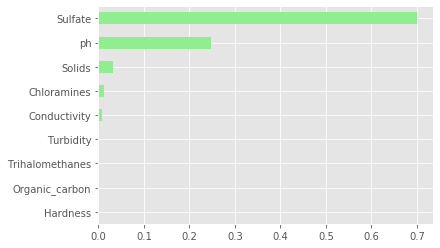

In [176]:
importances_dt = pd.Series(clf.feature_importances_, index = feature_cols)
sorted_importances_df = importances_dt.sort_values()
# create a horizontal bar plot
sorted_importances_df.plot(kind="barh", color="lightgreen")
plt.show()

In [177]:
drinkable_water = Predictions_Df[Predictions_Df['Predictions_Potability'] == 1]
not_drinkable_water = Predictions_Df[Predictions_Df['Predictions_Potability'] == 0]

In [178]:
drinkable_water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Predictions_Potability
1505,7.073797,190.27,15255.12,7.60,366.190000,418.48,13.31,68.940000,3.80,1
1437,7.085386,215.75,36776.14,6.67,294.110000,489.89,11.18,66.303585,4.75,1
2756,5.780000,200.40,25366.12,9.27,332.566975,525.53,10.68,54.080000,5.06,1
325,7.440000,193.12,13551.95,4.31,332.566975,430.49,19.40,72.080000,2.66,1
2354,7.073797,138.53,17905.48,7.93,399.500000,485.42,17.67,36.060000,5.44,1


In [179]:
drinkable_water.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Predictions_Potability
count,218.000000,218.000000,218.000000,218.00000,218.000000,218.000000,218.000000,218.000000,218.000000,218.0
mean,7.132758,198.407294,26977.912294,6.91422,319.045888,425.306330,14.374037,67.363442,3.926101,1.0
std,1.284754,34.837809,9628.921144,1.75700,34.622839,85.234383,3.099119,15.875687,0.859164,0.0
min,0.230000,108.700000,4857.250000,0.53000,129.000000,273.700000,5.430000,20.340000,1.640000,1.0
25%,6.572500,176.847500,19905.850000,5.78000,304.847500,354.870000,12.307500,56.862500,3.350000,1.0
50%,7.073797,198.705000,28252.870000,7.11500,332.566975,427.905000,14.260000,66.539608,3.875000,1.0
75%,7.740000,219.640000,32788.022500,8.05750,332.566975,490.010000,16.342500,77.160000,4.477500,1.0
max,10.810000,311.380000,56488.670000,12.91000,433.630000,638.000000,21.920000,120.030000,6.080000,1.0


In [180]:
not_drinkable_water.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Predictions_Potability
count,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.0
mean,7.024226,197.827190,21009.063895,7.240471,337.702733,422.969935,14.160157,66.901042,3.989778,0.0
std,1.508652,33.084245,7956.524096,1.568310,34.799402,79.709344,3.324447,15.696878,0.755701,0.0
min,0.990000,73.490000,1351.910000,2.400000,223.240000,210.320000,4.470000,15.680000,1.810000,0.0
25%,6.150000,178.220000,15379.910000,6.240000,320.390000,365.270000,11.870000,56.440000,3.490000,0.0
50%,7.085386,198.910000,20129.360000,7.200000,334.564311,417.740000,14.220000,66.303585,4.000000,0.0
75%,7.780000,218.390000,25410.810000,8.260000,356.550000,477.060000,16.330000,77.320000,4.530000,0.0
max,11.900000,317.340000,56867.860000,12.650000,476.540000,656.920000,27.010000,114.030000,6.200000,0.0


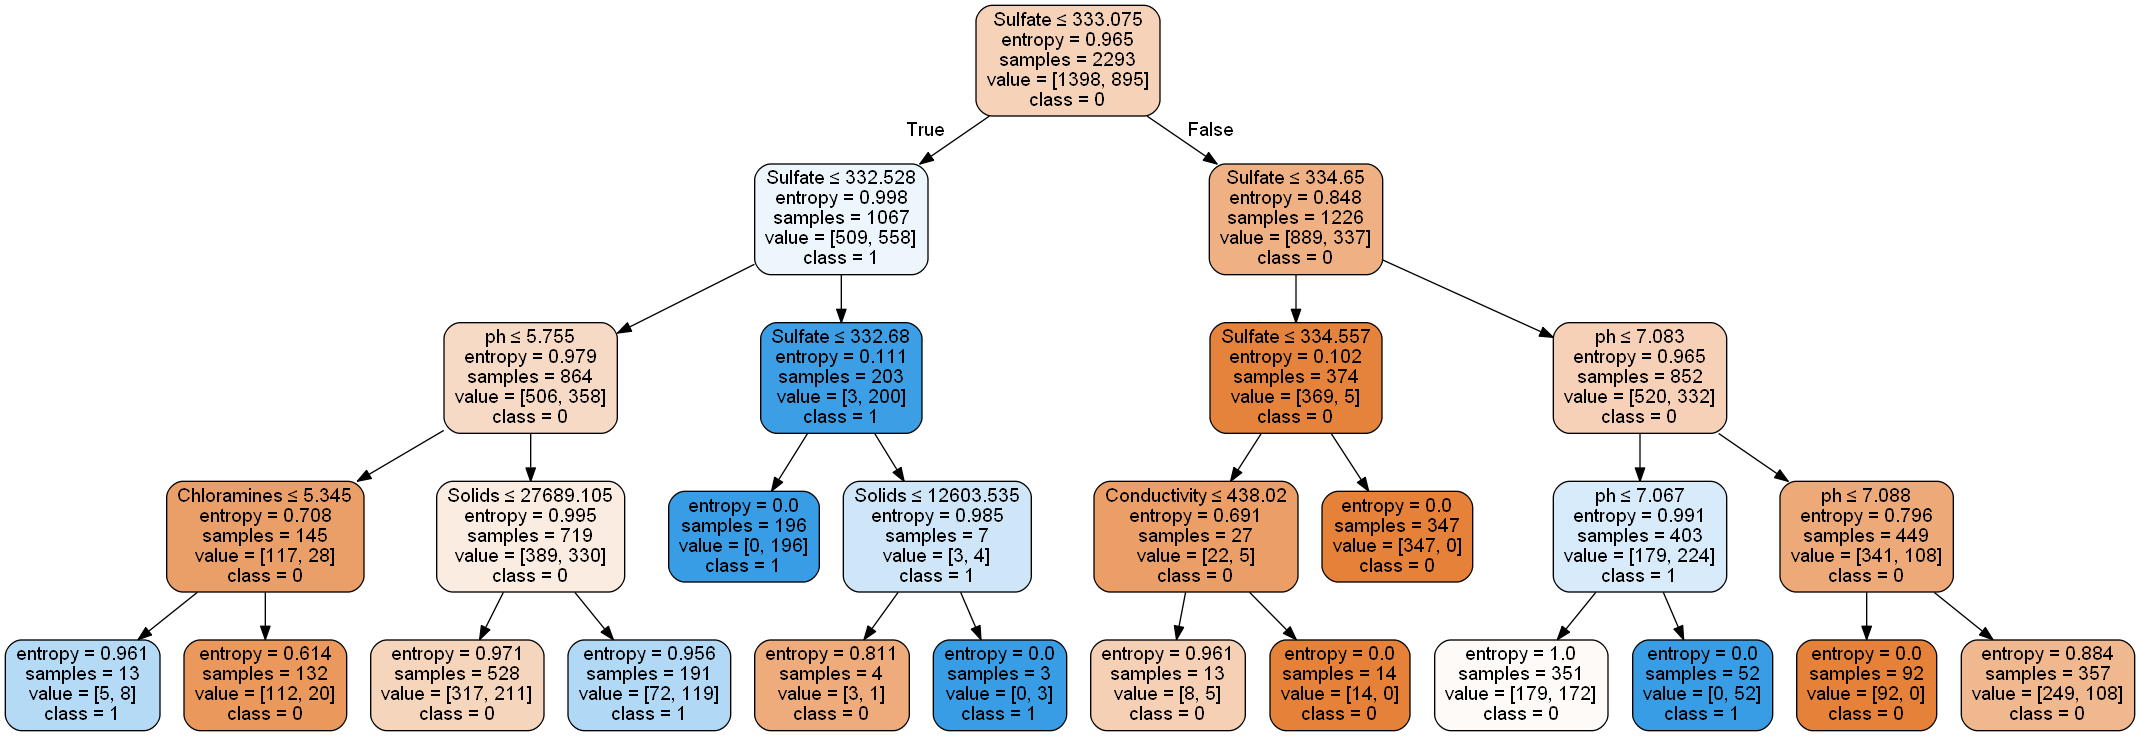

In [181]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Predictions_Df.png')
Image(graph.create_png())